In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans,AgglomerativeClustering

In [2]:
df=pd.read_excel("final_data_num.xlsx", index_col=0)

## ELBOW

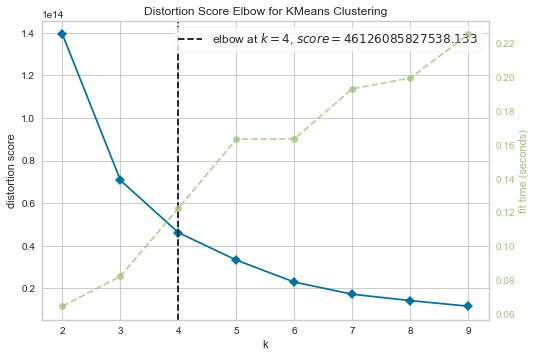

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [3]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

## Bayesian information criterion

In [5]:
# BIC for GMM
from sklearn.mixture import GaussianMixture
n_components = range(2, 8)
covariance_type = ['spherical', 'tied', 'diag', 'full']
bic_score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov, reg_covar=1e-4)
        gmm.fit(df)
        bic_score.append((cov,n_comp,gmm.bic(df)))

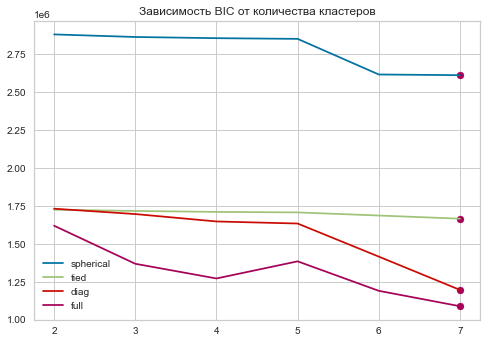

In [6]:
a=np.arange(8)
for i in range (4):
    curr_y=bic_score[6*i:6*(i+1)]
    y=[]
    for el in curr_y:
        y.append(el[2])
        
    min_el=min(y)
    min_index=0
    
    for index,el in enumerate(y):
        if el==min_el:
            min_index=index
                    
    plt.plot(a[2:],y, label=curr_y[0][0])
    plt.scatter(min_index+2,min_el, c='m', alpha=1)
plt.title("Зависимость BIC от количества кластеров")
plt.legend()
plt.savefig("image/bic.png")
plt.show()